<a href="https://colab.research.google.com/github/gulcihanglmz/natural-language-processing/blob/main/LSTM_long_short_term_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Long Short-Term Memory (LSTM)
· Long Short-Term Memory (LSTM), Recurrent Neural Network (RNN) türlerinden biridir.
· Uzun vadeli bağımlılıkları öğrenebilmek için özel olarak tasarlanmıştır.
. LSTM'nin Ana Amacı
· Zaman bağımlı verilerde uzun dönem bağımlılıkları öğrenmek.
· Geleneksel RNN'lerin yaşadığı vanishing gradient sorununu çözmek için geliştirilmiştir.
'''

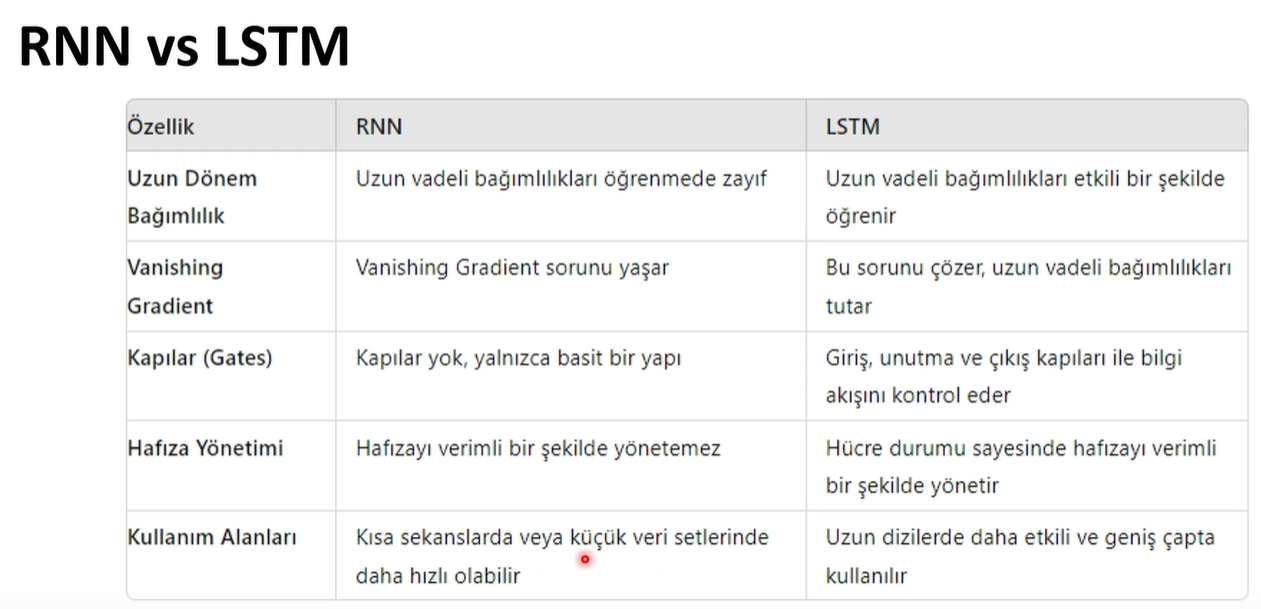

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding # lstm: Zamansal veriyi işler (hafıza özelliği)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # farklı uzunluktaki dizileri eşit uzunlukta yapar

In [ ]:
text = [
    "bugün hava çok güzel, dışarda yürüyüş yapmayı düşünüyorum",
    "kitap okumak beni gerçekten mutlu ediyor",
    "yeni bir dil öğrenmek insanın ufkunu genişletiyor",
    "kahvaltıda sıcak bir çay içmek güne harika bir başlangıç oluyor",
    "dün gece izlediğim film gerçekten çok etkileyiciydi",
    "arkadaşlarımla buluşup uzun uzun sohbet etmeyi seviyorum",
    "spora gitmek hem bedenime hem ruhuma iyi geliyor",
    "yeni yerler keşfetmek bana ilham veriyor",
    "bugün yoğun bir gün geçirdim ama verimliydi",
    "müzik dinlemek stresimi azaltıyor ve beni rahatlatıyor",
    "güzel bir kahve eşliğinde çalışmak daha keyifli oluyor",
    "bu hafta sonu doğa yürüyüşüne çıkmayı planlıyorum",
    "bir projeyi tamamlamak bana büyük bir tatmin sağlıyor",
    "akşamları kitap okumak beni dinlendiriyor",
    "yeni tarifler denemek mutfağı daha eğlenceli hale getiriyor",
    "fotoğraf çekmek anıları ölümsüzleştirmek gibi geliyor",
    "baharın gelişiyle her yer rengarenk oldu",
    "gün batımını izlemek huzur verici bir an",
    "sakin bir sabah yürüyüşü zihnimi boşaltıyor",
    "düzenli meditasyon yapmak stresimi azaltıyor",
    "film geceleri arkadaşlarla çok keyifli geçiyor",
    "yeni hobiler edinmek hayatı daha renkli kılıyor",
    "şehir dışında küçük bir kaçamak yapmak iyi geliyor",
    "sabah erken kalkıp doğayı izlemek harika hissettiriyor",
    "bir hedefe ulaşmanın verdiği mutluluk tarif edilemez",
    "resim yaparken zamanın nasıl geçtiğini anlamıyorum",
    "bahar temizliği yapmak evime ferahlık getiriyor",
    "bir fincan kahveyle kitap okumak en sevdiğim an",
    "bahçede çiçeklerle uğraşmak bana mutluluk veriyor",
    "dostlarla edilen sohbetler en değerli anlar oluyor",
    "yürüyüş yaparken müzik dinlemek enerjimi artırıyor",
    "yeni bir müzik grubu keşfetmek heyecan verici",
    "doğada kamp yapmak özgür hissettiriyor",
    "akşamları gün batımını fotoğraflamak hobim oldu",
    "bisiklete binmek çocukluk anılarımı canlandırıyor",
    "yeni filmler keşfetmek beni heyecanlandırıyor",
    "yağmur yağarken kitap okumak ayrı bir keyif",
    "sessiz bir kütüphanede çalışmak odaklanmamı sağlıyor",
    "hafta sonu planı yaparken heyecanlanıyorum",
    "yıldızları izlemek geceyi büyülü kılıyor",
    "sıcacık bir battaniyeye sarılıp film izlemek huzur veriyor",
    "yeni arkadaşlıklar kurmak hayata renk katıyor",
    "yeni bir diziyi tek oturuşta bitirmek çok eğlenceli",
    "gönüllü çalışmalara katılmak içimi ısıtıyor",
    "gün içinde kısa molalar vermek enerjimi tazeliyor",
    "soğuk bir günde sıcak çorba içmek harika oluyor",
    "deniz kenarında yürümek bana huzur veriyor",
    "eski fotoğraflara bakmak geçmişi hatırlatıyor",
    "yeni bir spora başlamak heyecan veriyor",
    "evde kendi ekmeğimi yapmayı öğrenmek istiyorum",
    "bahçede sabah kahvesi içmek mükemmel bir başlangıç",
    "bazen sessizlik en iyi terapi oluyor",
    "film festivallerine katılmak çok keyifli",
    "kardeşimle vakit geçirmek bana iyi geliyor",
    "yeni bir kitaba başlamak her zaman umut verici",
    "sabah koşusu yapmak güne enerjik başlamamı sağlıyor",
    "evcil hayvanımla oynamak günümün en güzel anı",
    "dışarda yağan yağmuru izlemek huzur veriyor",
    "hafta sonları aile kahvaltıları paha biçilemez",
    "yeni bir şehir gezmek yeni hikayeler demek",
    "serin bir akşamda sahilde yürümek harika hissettiriyor",
    "bir arkadaşınla uzun bir telefon konuşması yapmak moral veriyor",
    "parkta kitap okumak sessizliği değerlendirmek gibi",
    "eski bir defteri karıştırmak hatıraları canlandırıyor",
    "el yapımı hediyeler vermek beni çok mutlu ediyor",
    "spor salonunda çalıştıktan sonra kendimi güçlü hissediyorum",
    "bir ressamın sergisini gezmek ilham verici oluyor",
    "yeni bir kahve dükkanı keşfetmek küçük bir mutluluk",
    "gün sonunda günlüğüme yazı yazmak rahatlatıcı bir alışkanlık",
    "evde mum ışığında akşam yemeği yemek romantik oluyor",
    "sessiz bir sabah kahvaltısı bana enerji veriyor",
    "yeni bir oyun keşfetmek arkadaşlarla vakit geçirmek için harika",
    "soğuk havalarda sıcak çikolata içmek çocukluğumu hatırlatıyor",
    "sahilde kitap okumak bana huzur veriyor",
    "güneşli bir günde piknik yapmak keyifli bir mola oluyor",
    "bazen yalnız kalmak ruhuma iyi geliyor",
    "mutfakta müzik eşliğinde yemek yapmak çok eğlenceli",
    "pazarda taze sebzeler almak bana doğallığı hatırlatıyor",
    "akşam yürüyüşleri günün stresini atmamı sağlıyor",
    "yaz akşamlarında sokakta dondurma yemek çok güzel",
    "yeni başlayan bir diziye kaptırmak zamanın nasıl geçtiğini unutturuyor",
    "gökyüzündeki dolunayı izlemek büyüleyici bir deneyim",
    "evde küçük değişiklikler yapmak bile ruh halimi iyileştiriyor",
    "güzel bir şarkı duyduğumda hemen listeye ekliyorum",
    "spor yaparken hedefler koymak motivasyonumu artırıyor",
    "doğada sessiz bir köşe bulup sadece dinlenmek çok iyi geliyor",
    "bir sabah erkenden kalkıp deniz kenarında oturmak tarifsiz",
    "arkadaşlarla masa oyunları oynamak kahkahalarla dolu oluyor",
    "yeni bir tarif denediğimde sonucu görmek çok heyecanlı",
    "bahar sabahlarında yürüyüş yapmak taze bir başlangıç gibi",
    "kitapçıda saatler geçirmek en sevdiğim aktivitelerden biri",
    "kendi yazdığım şiirleri okumak duygularımı canlandırıyor",
    "sabahları kahve kokusuyla uyanmak harika bir his",
    "sakin bir öğleden sonra balkonda çay içmek çok keyifli",
    "yağmurlu günlerde evde film maratonu yapmak harika oluyor",
    "pencereden gelen serin hava eşliğinde kitap okumak huzur veriyor",
    "sokakta kaybolmak ve yeni yerler keşfetmek macera gibi geliyor",
    "kütüphanelerde kaybolmak bana çok iyi hissettiriyor"
]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text) # metinler üzerinde kelime frekanslarının öğren
total_words = len(tokenizer.word_index) + 1
print(total_words)

# n-gram dizileri oluştur - padding uygula
input_sequences = []
for text in text:
# metinleri kelime indekslerine cevir
  token_list = tokenizer. texts_to_sequences([text]) [0]

# her metin icin n-gram dizisi olusturalim
for i in range(1, len(token_list)):
  n_gram_sequence = token_list[ :i+1]
  input_sequences.append(n_gram_sequence)

# en uzun diziyi bulalim, tum dizileri ayni uzunluga getirelim
max_sequence_length = max(len(x) for x in input_sequences)

# dizilere padding islemi uygula, hepsinin ayni uzunlukta olmasini sagla
input_sequences = pad_sequences(input_sequences, maxlen = max_sequence_length, padding = "pre")